# Loan Eligibility Prediction

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History, and others.


In [16]:
# importing libraries

import pandas as pd
import seaborn as sns


In [3]:
# import data CSV

df = pd.read_csv('data.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


### About the features
```text
Loan_ID --> Unique id for every loan request
Gender --> Applicant's Gender
Married --> Applicant's Marital status
Dependents --> How many people are dependent on the Applicant in his/her family.
Education --> Applicant's Education
Self_Employed --> Whether the applicant is employed | Owner of business
ApplicantIncome --> Applicant's Income on record
CoapplicantIncome --> CoApplicant's Income on record
LoanAmount --> Amount of Loan required
Loan_Amount_Term --> Duration in which applicant wants to pay back the loan amount.
Credit_History --> Whether the candidate has good or bad credit history in past
Property_Area --> Type of locality of property which the candidate has given as mortgage. The type tells us about property valuation.
```


In [19]:
# droping Loan_ID column because it is not important

df.drop('Loan_ID', axis=1, inplace=True)


In [20]:
# checking for duplicates

df.duplicated().sum()


0

In [21]:
# checking for null values

df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

In [22]:
# dealing with null values

df.dropna(subset=['Gender'], inplace=True) # Can't fill null values for Gender, so we drop them

# for missing values in Married, we fill with Yes if Dependents is not 0, and No if Dependents is 0
df.loc[(df['Married'].isnull()) & (df['Dependents'] != '0'), 'Married'] = 'Yes'
df.loc[(df['Married'].isnull()) & (df['Dependents'] == '0'), 'Married'] = 'No'

# for missing values in dependents, we fill with 0 is Married is No, and 1 if Married is Yes
df.loc[(df['Dependents'].isnull()) & (df['Married'] == 'No'), 'Dependents'] = '0'
df.loc[(df['Dependents'].isnull()) & (df['Married'] == 'Yes'), 'Dependents'] = '1'

# for missing values in Education, we will drop them
df.dropna(subset=['Education'], inplace=True)

# for missing values in Self_Employed, we fill with mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# for missing values in ApplicantIncome, we fill with median, since it's not afected by outliers
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)

# for missing values in CoapplicantIncome, we fill with median, since it's not afected by outliers
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median(), inplace=True)

# for missing values in LoanAmount, we fill with median, since it's not afected by outliers
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# for missing values in Loan_Amount_Term, we fill with median, since it's not afected by outliers
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# for missing values in Credit_History, we fill with mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# dropping other null values
df.dropna(inplace=True)


In [23]:
# checking for null values again

df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

In [24]:
# Checking data types

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    float64
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 60.7+ KB


In [25]:
# changing data types to numeric using LabelEncoder

import sklearn.preprocessing as pp

le = pp.LabelEncoder()

# encoding all columns with object data type
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,127.0,360.0,1.0,2,1
1,1,1,1,0,0,3806.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [26]:
# checking data statistics

df.describe()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.812709,0.648829,0.749164,0.222408,0.128763,5300.240803,1620.115251,144.172241,342.341137,0.856187,1.035117,0.687291
std,0.390472,0.477736,0.996119,0.416212,0.335217,5810.057539,2953.141323,81.137570,64.867891,0.351193,0.787531,0.463985
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2883.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3806.000000,1128.500000,127.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5771.500000,2305.000000,162.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000,2.000000,1.000000


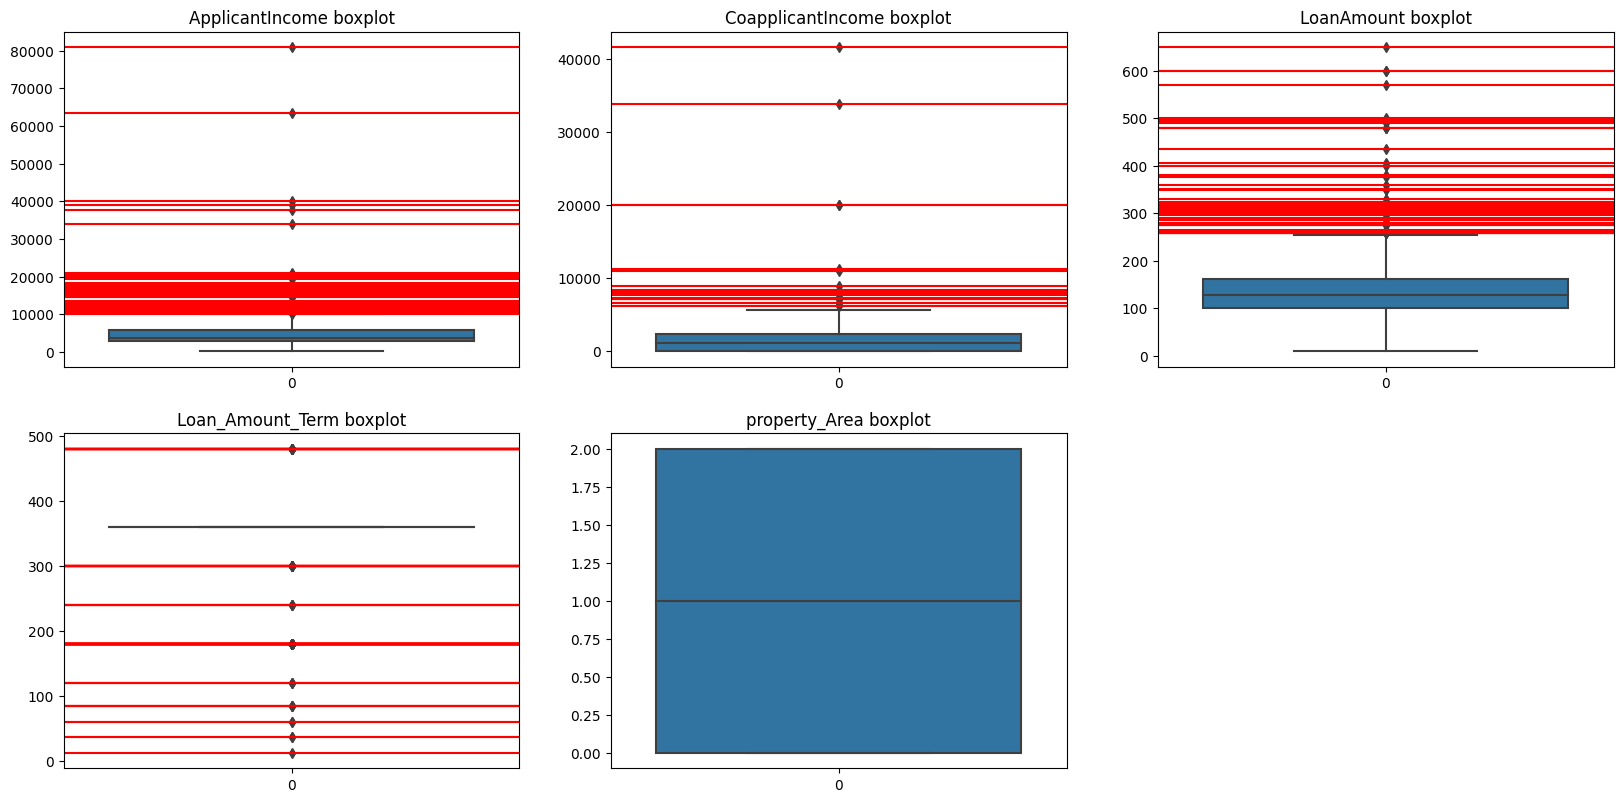

In [43]:
# checking for outliers

import matplotlib.pyplot as plt


# adding red color to outliers
def red_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    iqr = q3 - q1 # Interquartile range
    
    fence_low = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr

    outliers = data.loc[(data[column] < fence_low) | (data[column] > fence_high)]

    return outliers

def plot_ouutliers():
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'property_Area']]):
        plt.subplot(4, 3, i+1)
        sns.boxplot(df[col])
        
        # adding red color to outliers
        outliers = red_outliers(df, col)
        for outlier in outliers[col]:
            plt.axhline(outlier, color='r')
        
        plt.title(col + ' boxplot')

    plt.show()

plot_ouutliers()


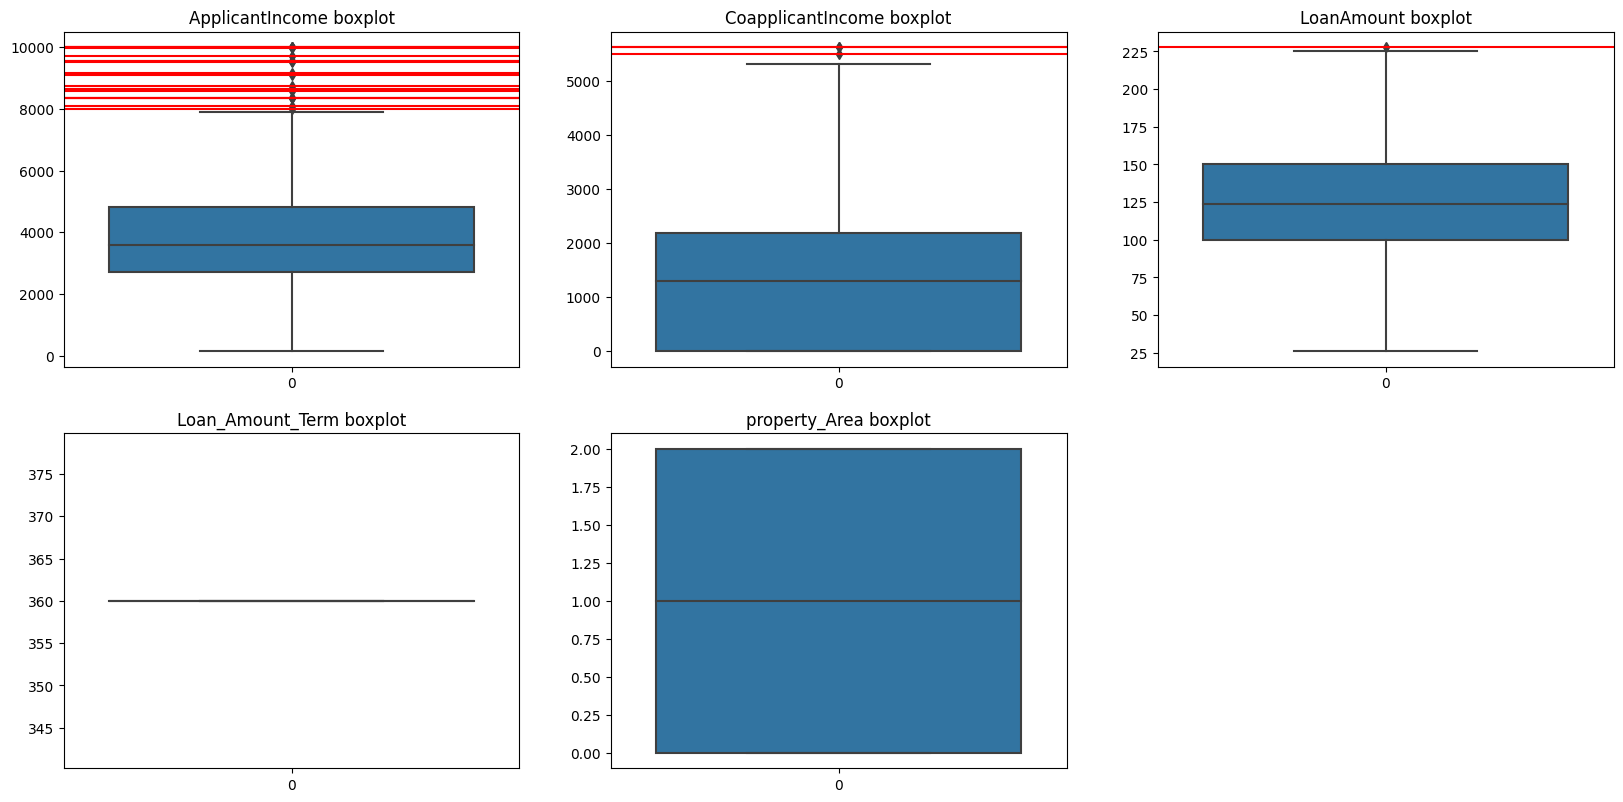

In [44]:
# removing outliers

df = df[~df['ApplicantIncome'].isin(red_outliers(df, 'ApplicantIncome')['ApplicantIncome'])]
df = df[~df['CoapplicantIncome'].isin(red_outliers(df, 'CoapplicantIncome')['CoapplicantIncome'])]
df = df[~df['LoanAmount'].isin(red_outliers(df, 'LoanAmount')['LoanAmount'])]
df = df[~df['Loan_Amount_Term'].isin(red_outliers(df, 'Loan_Amount_Term')['Loan_Amount_Term'])]
df = df[~df['property_Area'].isin(red_outliers(df, 'property_Area')['property_Area'])]

plot_ouutliers() # checking outliers again


In [45]:
# checking data statistics again

df.describe()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.0,434.000000,434.000000,434.000000
mean,0.797235,0.633641,0.686636,0.239631,0.108295,3984.958525,1304.456498,124.686636,360.0,0.864055,0.974654,0.716590
std,0.402523,0.482365,0.967584,0.427351,0.311111,1766.046332,1365.017482,38.832779,0.0,0.343125,0.784847,0.451174
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,26.000000,360.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2721.500000,0.000000,100.000000,360.0,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3599.000000,1293.500000,124.000000,360.0,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,4821.000000,2183.000000,150.000000,360.0,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10000.000000,5625.000000,228.000000,360.0,1.000000,2.000000,1.000000
